In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pyproj import Proj

## Leitura dos dados e sistemas de coordenadas
Utilizando a classe ShareGPS, foi criado um dataset onde eu coletei os dados de uma caminhada ao redor do quarteirão da minha casa. Adiante, iremos ver a conversão do sistema de coordenadas de latitude e longitude para o sistema de coordenadas Universal Transverssa de Mercator (utm), onde as medidas são dadas em metros, possibilitando aplicar aos dados os conceitos de geometria analitca e algebra linear.

Como o sistema UTM apresenta os valores em metros, eu subtraí em todo o conjunto de dados um valor de ofset para lidar apenas com as distâncias absolutas em metros

In [11]:
gps = pd.read_csv("out.csv", sep=";")

In [12]:
myProj = Proj("+proj=utm +zone=23K, +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
utmx, utmy = myProj(np.array(gps.lon), np.array(gps.lat))

utmx = utmx - utmx.min()
utmy = utmy - utmy.min()

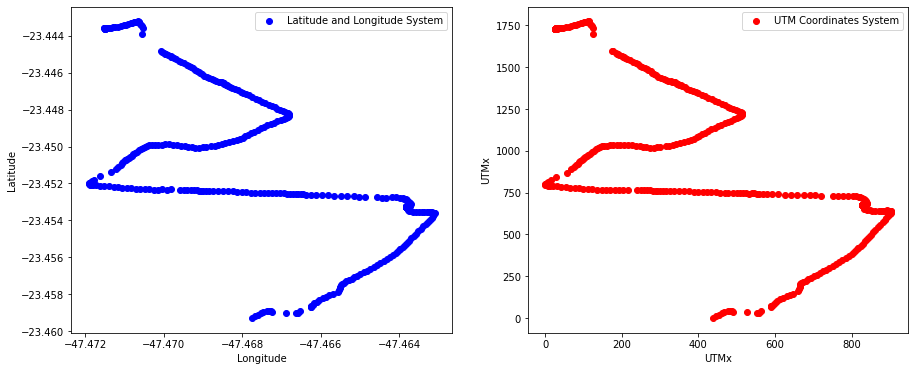

In [13]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(gps.lon, gps.lat, color='blue', label="Latitude and Longitude System")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(utmx, utmy, color='red', label="UTM Coordinates System")
plt.xlabel('UTMx')
plt.ylabel('UTMx')
plt.legend()

plt.show()

### Orientação: Direção da rota e Direção do objetivo



In [13]:
#Cria um ponto no plano x,y para ser o objetivo
objetivo = np.array([250/2, 250/2])

#Salva o numero de pontos disponiveis
leng = utmx.shape[0]

#Transforma os arrays utmx e utmy em um array utm com shape (n, 2)
utm = np.zeros((leng, 2))

for i in range(0, leng):
    
    utm[i, 0] = utmx[i] 
    utm[i, 1] = utmy[i]

In [14]:
#Calcula os vetores unitarios de direção da trajetoria e direção pro objetivo
v_dir = np.zeros((leng, 2))
v_obj = np.zeros((leng, 2))

for i in range(5, leng):
    
    v_dir[i] = utm[i, :] - utm[i-5, :]
    v_dir[i] = (v_dir[i] / np.linalg.norm(v_dir[i])) #Vetor unitario 
    
    v_obj[i] = objetivo - utm[i]
    v_obj[i] = (v_obj[i] / np.linalg.norm(v_objl[i]))

/home/gabriel/share-gps/env36/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [15]:
v_ori = np.array(v_ori)
v_goal = np.array(v_goal)

In [16]:
way = pd.DataFrame(columns='utmx utmy orix oriy goalx goaly angle'.split(' '))

In [17]:
way.utmx = utmx
way.utmy = utmy
way[['orix', 'oriy']] = v_ori
way[['goalx', 'goaly']] = v_goal

In [18]:
#Cria uma lista para salvar os valores de Theta para cada situação
angle = []

for i in range(0, leng):
    
    
    cosT = v_ori[i,0]*v_goal[i,0] + v_ori[i, 1]*v_goal[i, 1] 
    theta = np.arccos(cosT) #Calcula o angulo a partir do cosseno
    theta = np.degrees(theta) #Transforma o Theta de rad pra graus
    angle.append(theta)


In [19]:
way.angle = angle

In [20]:
way.to_csv('orientation.csv')

In [22]:
for i in way:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [59]:
np.degrees(theta)

153.402221088096

In [27]:
asd = np.array(way.utmx)

In [29]:
asd

array([126.75767515, 126.75767515, 125.93476728, 125.7642713 ,
       125.77055041, 125.78957803, 125.79281273, 126.30682965,
       126.47428121, 126.82103684, 126.64730619, 126.30682965,
       125.97605719, 125.9695878 , 125.96007399, 125.78006422,
       125.4270294 , 125.06054039, 124.71682906, 124.37330798,
       124.88104592, 124.69475695, 124.69475695, 123.84654232,
       123.67281161, 124.00358415, 123.48005315, 123.48005315,
       123.48005315, 122.09536841, 122.09536841, 121.77087505,
       121.93762107, 121.60342352, 121.92810714, 121.92810714,
       121.92810714, 121.59714432, 121.43292754, 121.78362373,
       121.78362373, 121.95017946, 121.78990293, 121.61940696,
       121.95017946, 121.95017946, 121.95017946, 121.95017946,
       121.95017946, 121.95017946, 121.95017946, 122.11439625,
       122.44535907, 121.92810714, 121.41713438, 121.08940633,
       121.947135  , 123.17135283, 124.0290813 , 125.59358504,
       126.10455761, 126.79249553, 127.30346808, 127.63